# 10 Ways to Improve Your Data Visualization

If a picture is worth a thousand words, then a data visualization is worth a thousand statistics.

Here are 10 quick ways to get your message across better when telling a story with data.

1. Know your Audience
2. Color and Contrast
3. Room to Breathe
4. Fun with Fonts
5. Try a different starting point: Bokeh
6. Gifs: not just for memes anymore
7. Make it interactive with Bokeh
8. Let's publish some Dashboards!
9. Everyone loves a good map
10. And many more

## #1: Know your Audience

* Are you trying to communicate a specific point? Or give discovery and analysis tools?
* Will your audience want to follow through your discovery? (Academic - start from the beginning)
* Or do they want the answer now? (Executive - start with the conclusion, the rest is supporting material)

    
  
  

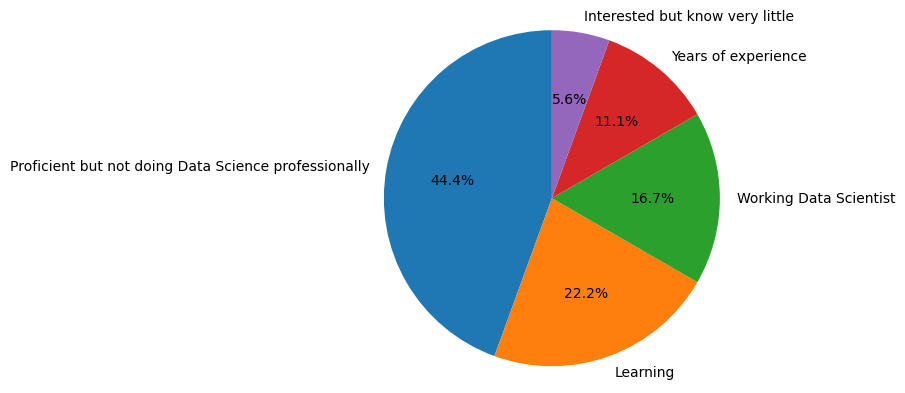

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

survey = pd.read_csv("Charleston Data Science 2022 Survey.csv")

counts = survey["What is your level of expertise in Data Science?"].value_counts()

fig1, ax1 = plt.subplots()
ax1.pie(counts, labels=counts.keys(), autopct='%1.1f%%', startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

## A little visual design goes a long way

![elements of design](https://visme.co/blog/wp-content/uploads/2015/09/designelements.jpg)

https://visme.co/blog/elements-principles-good-design/

### #2: Color and Contrast

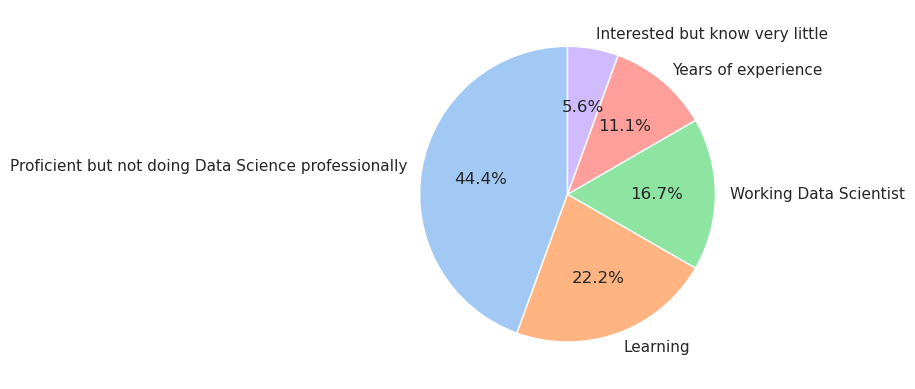

In [2]:
import seaborn as sns

# maybe a bit better colors
sns.set_theme(style="whitegrid", palette="pastel")

# create pie chart, but there's no seaborn piechart
plt.pie(counts, labels = counts.keys(), autopct='%1.1f%%', startangle=90)
plt.show()

### #3: Room to Breath

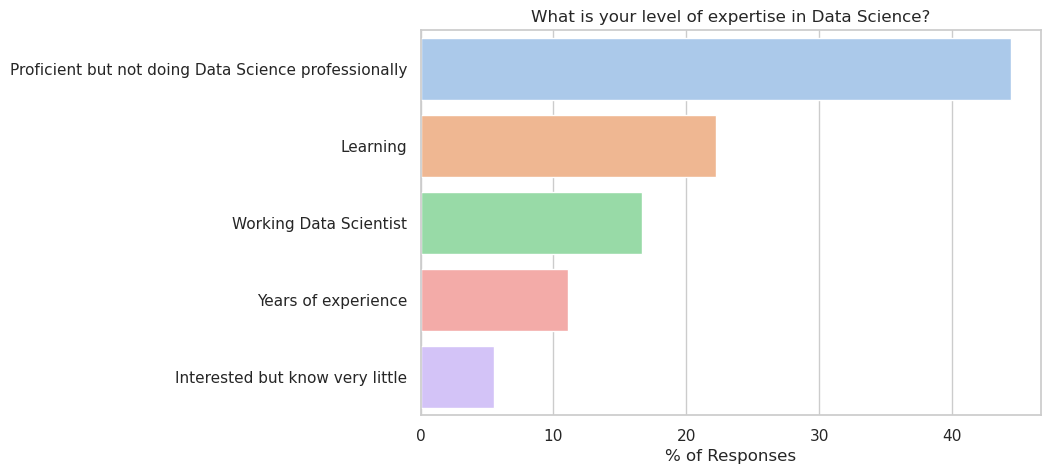

In [3]:
pcts = counts / sum(counts) * 100
pcts_f = ["%.1f%%" % member for member in pcts]

# Seaborn barplot
sns.set_theme(style="whitegrid", palette="pastel")

plt.figure(figsize=(8,5))
ax1 = sns.barplot(y=counts.keys(), x=pcts)

plt.title('What is your level of expertise in Data Science?')
plt.xlabel('% of Responses')

plt.show()

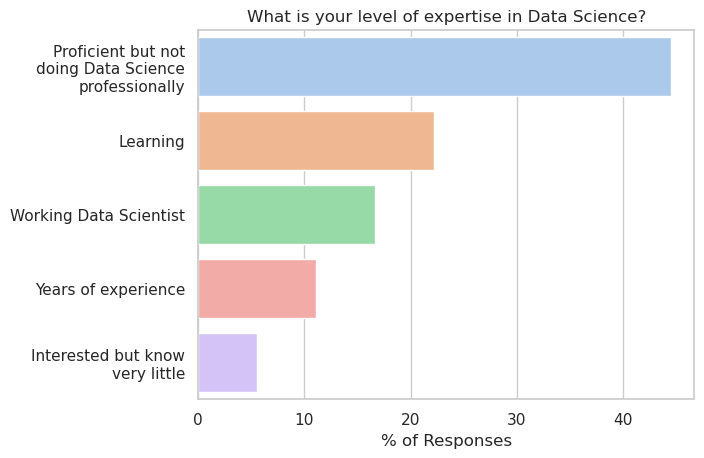

In [4]:
# Wrap those long Text Labels
import textwrap
def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_yticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width,
                      break_long_words=break_long_words))
    ax.set_yticklabels(labels, rotation=0)
    
# Set up the plot again
ax1 = sns.barplot(y=counts.keys(), x=pcts)
plt.title('What is your level of expertise in Data Science?')
plt.xlabel('% of Responses')

# Now wrap those labels
wrap_labels(ax1, 22)

plt.show()

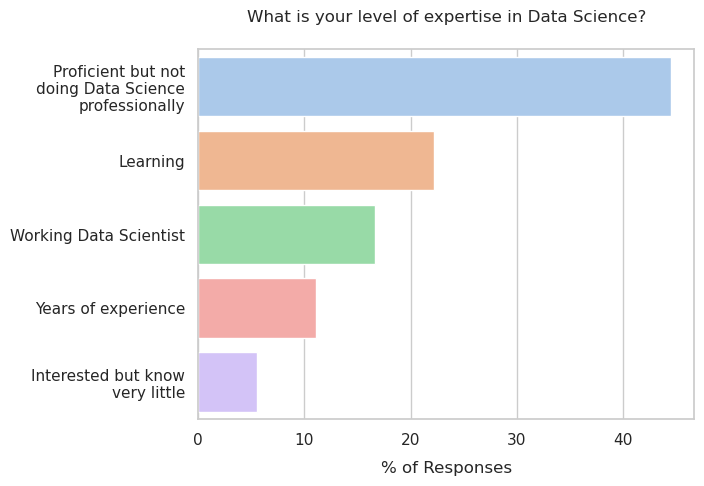

In [5]:
# Set up the plot again, but now with padding
ax1 = sns.barplot(y=counts.keys(), x=pcts)
plt.title('What is your level of expertise in Data Science?', pad=20)
plt.xlabel('% of Responses', labelpad=10)

# Wrap those labels
wrap_labels(ax1, 22)

plt.show()

### #4: Fun with Fonts

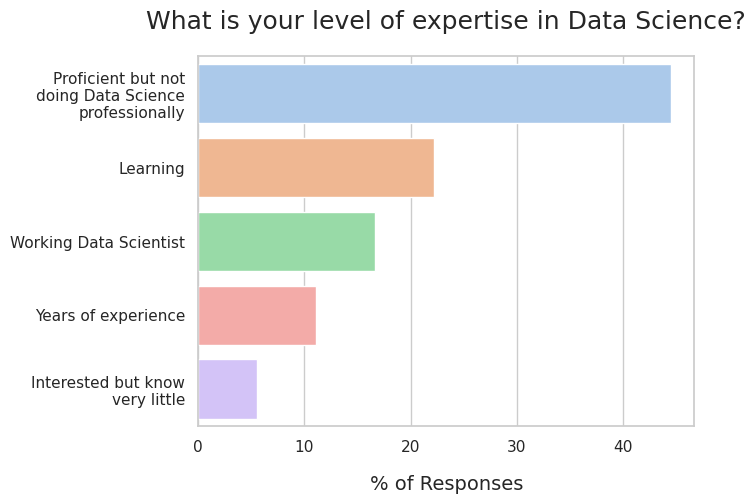

In [6]:
# Set up the plot again
ax1 = sns.barplot(y=counts.keys(), x=pcts)

# Explicitly set the font sizes this time
plt.title('What is your level of expertise in Data Science?', pad = 20, fontsize = 18)
plt.xlabel('% of Responses', labelpad = 15, fontsize = 14)

# Now wrap those labels
wrap_labels(ax1, 22)

plt.show()

In [7]:
import matplotlib.font_manager
flist = matplotlib.font_manager.findSystemFonts()
names = [matplotlib.font_manager.FontProperties(fname=fname).get_name() for fname in flist]
names[0:5]

['Latin Modern Mono Prop',
 'Latin Modern Roman',
 'Latin Modern Mono',
 'Latin Modern Sans',
 'Nimbus Roman']

#### Better, but let's take our fonts a little further

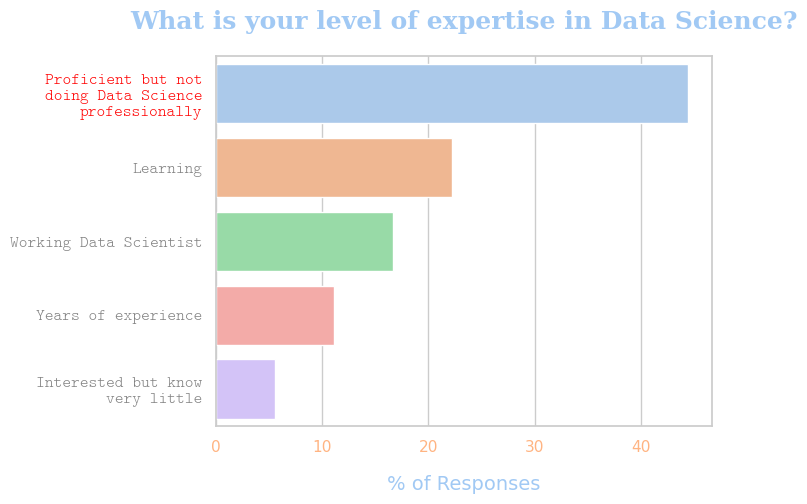

In [8]:
# So many parameters https://matplotlib.org/stable/tutorials/introductory/customizing.html

import matplotlib as mpl
mpl.rcParams['text.color'] = "gray"

# Borrowing color palettes from Seaborn
colors = sns.color_palette("pastel")

# Using them for some label colors
mpl.rcParams['axes.labelcolor'] = colors[0]
mpl.rcParams['xtick.labelcolor'] = colors[1]
mpl.rcParams['ytick.labelcolor'] = "gray"

# Set up the plot again
ax1 = sns.barplot(y=counts.keys(), x=pcts)

# Now wrap those labels
wrap_labels(ax1, 22)

# Set font properties using a dict
titlefont = {
    'family': 'serif',
    'color':  colors[0],
    'weight': 'bold',
    'size': 18,
}

plt.title('What is your level of expertise in Data Science?', pad = 20, fontdict = titlefont)
plt.xlabel('% of Responses', labelpad = 15, fontsize = 14)

# Selectively set the tick label fonts
for i, tick in enumerate(ax1.get_yticklabels()):
    tick.set_font("Latin Modern Mono Light")
    if (i == 0):
        tick.set_color('red')

plt.show()

#### Ok, but now contrast is a little week, so let's change up the colors one more time

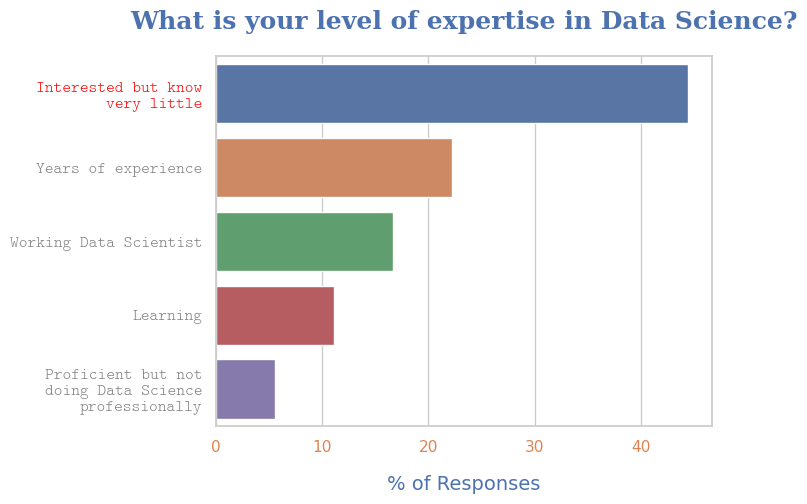

In [25]:
# So many parameters https://matplotlib.org/stable/tutorials/introductory/customizing.html

import matplotlib as mpl
mpl.rcParams['text.color'] = "gray"

# Borrowing color palettes from Seaborn
colors = sns.color_palette("deep")

# Using them for some label colors
mpl.rcParams['axes.labelcolor'] = colors[0]
mpl.rcParams['xtick.labelcolor'] = colors[1]
mpl.rcParams['ytick.labelcolor'] = "gray"

# Set up the plot again
ax1 = sns.barplot(y=counts.keys(), x=pcts)

# Now wrap those labels
wrap_labels(ax1, 22)

# Set font properties using a dict
titlefont = {
    'family': 'serif',
    'color':  colors[0],
    'weight': 'bold',
    'size': 18,
}

plt.title('What is your level of expertise in Data Science?', pad = 20, fontdict = titlefont)
plt.xlabel('% of Responses', labelpad = 15, fontsize = 14)

# Selectively set the tick label fonts
for i, tick in enumerate(ax1.get_yticklabels()):
    tick.set_font("Latin Modern Mono Light")
    if (i == 0):
        tick.set_color('red')

plt.show()

## #5: Why not try a different aproach?

In [9]:
from bokeh.io import output_notebook, show, curdoc
from bokeh.plotting import figure
from bokeh.models import CategoricalTicker

curdoc().theme = 'night_sky'

counts = counts.sort_values(ascending = True)

x = counts.keys()
y = counts

# https://docs.bokeh.org/en/2.4.2/docs/reference/models/plots.html

p = figure(
    title='What is your level of expertise in Data Science?',
    y_range=x.values,
    x_axis_label='Counts of Responses',
    min_width=1000, 
    min_height=500,
    min_border=80,
    min_border_left=400
)

p.title.text_font_size = '18pt'

p.yaxis.ticker = CategoricalTicker()
p.hbar(right=y, y=x, height=0.5)
output_notebook()
show(p)

Loading BokehJS ...

## #6: Gifs - Not just for memes anymore!

![Data Cat](https://media0.giphy.com/media/SvckSy7fFviqrq8ClF/giphy.gif?cid=ecf05e473bqz44rsa3okbhmhzcpq9f4c0ejdxges9hnwkn2g&rid=giphy.gif&ct=g)

In [26]:
# taken from https://www.geeksforgeeks.org/create-an-animated-gif-using-python-matplotlib/

import numpy as np
from matplotlib.animation import FuncAnimation
from IPython import display
import matplotlib.pyplot as plt

Figure = plt.figure()

# creating a plot
lines_plotted = plt.plot([])
line_plotted = lines_plotted[0]
plt.xlim(0,2*np.pi)
plt.ylim(-1.1,1.1)

# initialising x from 0 to 2
x = np.linspace(0, 2 * np.pi, 100)

#initially
y = 0

# function takes frame as an input
def AnimationFunction(frame):
    # setting y according to frame
    # number and + x. It's logic
    y = np.cos(x+2*np.pi*frame/100)

    # line is set with new values of x and y
    line_plotted.set_data((x, y))

anim_created = FuncAnimation(Figure, AnimationFunction, frames=100, interval=25)

video = anim_created.to_html5_video()
html = display.HTML(video)
display.display(html)
 
# good practice to close the plt object.
plt.close()

### Or do it with any graphing library and make your own Gif

building plots

creating gif

gif complete

Removing Images



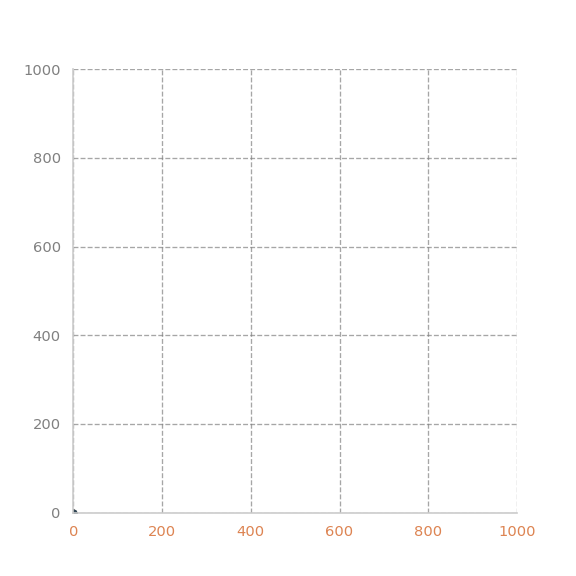

In [27]:
# Taken from https://towardsdatascience.com/basics-of-gifs-with-pythons-matplotlib-54dd544b6f30

import os
import numpy as np
import matplotlib.pyplot as plt
import imageio.v2 as imageio

sns.set_theme(style="whitegrid", palette="pastel")

coordinates_lists = [[[0],[0]],
                     [[100,200,300],[100,200,300]],
                     [[400,500,600],[400,500,600]],
                     [[400,500,600,400,500,600],[400,500,600,600, 500,400]],
                     [[500],[500]],
                     [[0],[0]]]
gif_name = 'movie' 
n_frames=10
marker_color='#283F4E' 
marker_size = 25
print('building plots\n')
filenames = []

for index in np.arange(0, len(coordinates_lists)-1):
    # get current and next coordinates
    x = coordinates_lists[index][0]
    y = coordinates_lists[index][1]
    x1 = coordinates_lists[index+1][0]
    y1 = coordinates_lists[index+1][1]
    # Check if sizes match
    while len(x) < len(x1):
        diff = len(x1) - len(x)
        x = x + x[:diff]
        y = y + y[:diff]
    while len(x1) < len(x):
        diff = len(x) - len(x1)
        x1 = x1 + x1[:diff]
        y1 = y1 + y1[:diff]
        
    # calculate paths
    x_path = np.array(x1) - np.array(x)
    y_path = np.array(y1) - np.array(y)
    
    for i in np.arange(0, n_frames + 1):                
        # calculate current position
        x_temp = (x + (x_path / n_frames) * i)
        y_temp = (y + (y_path / n_frames) * i)
        # plot
        fig, ax = plt.subplots(figsize=(6, 6), subplot_kw = dict(aspect="equal"))
            
        plt.scatter(x_temp, y_temp, c=marker_color, s = marker_size)
        plt.xlim(0,1000)
        plt.ylim(0,1000)
        # remove spines
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        # grid
        ax.set_axisbelow(True)
        ax.yaxis.grid(color='gray', linestyle='dashed', alpha=0.7)
        ax.xaxis.grid(color='gray', linestyle='dashed', alpha=0.7)
        
        # build file name and append to list of file names
        filename = f'images/frame_{index}_{i}.png'
        filenames.append(filename)
        if (i == n_frames):
            for i in range(5):
                filenames.append(filename)
        # save img
        plt.savefig(filename, dpi=96)
        plt.close()
        
# Build GIF
print('creating gif\n')
with imageio.get_writer(f'{gif_name}.gif', mode='I') as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)
print('gif complete\n')

print('Removing Images\n')
# Remove files
for filename in set(filenames):
    os.remove(filename)

display.Image("movie.gif")

## #7: Make it Interactive with Bokeh

In [36]:
# From https://thedatafrog.com/en/articles/interactive-visualization-bokeh-jupyter/

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# reset the theme
curdoc().theme = 'caliber'

# build a bunch of random data
sample1 = np.random.multivariate_normal([0,0], [[1,0],[0,1]], 5000)
sample2 = np.random.multivariate_normal([1,1], [[0.05,0],[0,0.05]], 5000)
sample = np.concatenate([sample1, sample2])

# load up bokeh
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
output_notebook()

# set some tools https://docs.bokeh.org/en/test/docs/user_guide/tools.html
tools = "hover, box_zoom, undo, crosshair"

# create the plot
p = figure(tools=tools)
p.scatter(sample[:,0], sample[:,1], alpha=0.5)

show(p)

Loading BokehJS ...

#### Lots of interaction posibilities

https://docs.bokeh.org/en/latest/docs/gallery.html

In [37]:
# from https://docs.bokeh.org/en/latest/docs/examples/interaction/linking/data_table_plot.html

from bokeh.layouts import column
from bokeh.models import (ColumnDataSource, DataTable, HoverTool, IntEditor,
                          NumberEditor, NumberFormatter, SelectEditor,
                          StringEditor, StringFormatter, TableColumn)
from bokeh.plotting import figure, show
from bokeh.sampledata.autompg2 import autompg2 as mpg

source = ColumnDataSource(mpg)

manufacturers = sorted(mpg["manufacturer"].unique())
models = sorted(mpg["model"].unique())
transmissions = sorted(mpg["trans"].unique())
drives = sorted(mpg["drv"].unique())
classes = sorted(mpg["class"].unique())

columns = [
    TableColumn(field="manufacturer", title="Manufacturer",
                editor=SelectEditor(options=manufacturers),
                formatter=StringFormatter(font_style="bold")),
    TableColumn(field="model", title="Model",
                editor=StringEditor(completions=models)),
    TableColumn(field="displ", title="Displacement",
                editor=NumberEditor(step=0.1), formatter=NumberFormatter(format="0.0")),
    TableColumn(field="year", title="Year", editor=IntEditor()),
    TableColumn(field="cyl", title="Cylinders", editor=IntEditor()),
    TableColumn(field="trans", title="Transmission",
                editor=SelectEditor(options=transmissions)),
    TableColumn(field="drv", title="Drive", editor=SelectEditor(options=drives)),
    TableColumn(field="class", title="Class", editor=SelectEditor(options=classes)),
    TableColumn(field="cty", title="City MPG", editor=IntEditor()),
    TableColumn(field="hwy", title="Highway MPG", editor=IntEditor()),
]
data_table = DataTable(source=source, columns=columns, editable=True, width=800,
                       index_position=-1, index_header="row index", index_width=60)

p = figure(width=800, height=300, tools="pan,wheel_zoom,xbox_select,reset", active_drag="xbox_select")

cty = p.circle(x="index", y="cty", fill_color="#396285", size=8, alpha=0.5, source=source)
hwy = p.circle(x="index", y="hwy", fill_color="#CE603D", size=8, alpha=0.5, source=source)

tooltips = [
    ("Manufacturer", "@manufacturer"),
    ("Model", "@model"),
    ("Displacement", "@displ"),
    ("Year", "@year"),
    ("Cylinders", "@cyl"),
    ("Transmission", "@trans"),
    ("Drive", "@drv"),
    ("Class", "@class"),
]
cty_hover_tool = HoverTool(renderers=[cty], tooltips=tooltips + [("City MPG", "@cty")])
hwy_hover_tool = HoverTool(renderers=[hwy], tooltips=tooltips + [("Highway MPG", "@hwy")])

p.add_tools(cty_hover_tool, hwy_hover_tool)

show(column(p, data_table))

## #8: Make some interactive dashboards!

![dashboard popularity](https://global-uploads.webflow.com/5d3ec351b1eba4332d213004/5f99e10dafbd69a99c875340_C8_qX8dvzv60T4LVZ9GftX-ZH-VJzq3sjUroWWH5XSWw8RFHnCCPPrC6jB3EFVuQdwiqhoEMQKFV-dFz7t6fqaRpSZGvBKI0i1Utj38_j9a54GXMuzi1BiepdIMjOK4ATVdF2131.png)

https://www.datarevenue.com/en-blog/data-dashboarding-streamlit-vs-dash-vs-shiny-vs-voila

## #9: Everyone loves a good map!

In [14]:
import bokeh
bokeh.sampledata.download()

Using data directory: /home/jovyan/.bokeh/data
Skipping 'CGM.csv' (checksum match)
Skipping 'US_Counties.zip' (checksum match)
Skipping 'us_cities.json' (checksum match)
Skipping 'unemployment09.csv' (checksum match)
Skipping 'AAPL.csv' (checksum match)
Skipping 'FB.csv' (checksum match)
Skipping 'GOOG.csv' (checksum match)
Skipping 'IBM.csv' (checksum match)
Skipping 'MSFT.csv' (checksum match)
Skipping 'WPP2012_SA_DB03_POPULATION_QUINQUENNIAL.zip' (checksum match)
Skipping 'gapminder_fertility.csv' (checksum match)
Skipping 'gapminder_population.csv' (checksum match)
Skipping 'gapminder_life_expectancy.csv' (checksum match)
Skipping 'gapminder_regions.csv' (checksum match)
Skipping 'world_cities.zip' (checksum match)
Skipping 'airports.json' (checksum match)
Skipping 'movies.db.zip' (checksum match)
Skipping 'airports.csv' (checksum match)
Skipping 'routes.csv' (checksum match)
Skipping 'haarcascade_frontalface_default.xml' (checksum match)
Skipping 'SampleSuperstore.csv.zip' (checks

In [15]:
from bokeh.io import show
from bokeh.models import LogColorMapper
from bokeh.palettes import Viridis6 as palette
from bokeh.plotting import figure
from bokeh.sampledata.unemployment import data as unemployment
from bokeh.sampledata.us_counties import data as counties

palette = tuple(reversed(palette))

counties = {
    code: county for code, county in counties.items() if county["state"] == "sc"
}

county_xs = [county["lons"] for county in counties.values()]
county_ys = [county["lats"] for county in counties.values()]

county_names = [county['name'] for county in counties.values()]
county_rates = [unemployment[county_id] for county_id in counties]
color_mapper = LogColorMapper(palette=palette)

data=dict(
    x=county_xs,
    y=county_ys,
    name=county_names,
    rate=county_rates,
)

TOOLS = "pan,wheel_zoom,reset,hover,save"

p = figure(
    title="South Carolina Unemployment, 2009", tools=TOOLS,
    x_axis_location=None, y_axis_location=None,
    tooltips=[
        ("Name", "@name"), ("Unemployment rate", "@rate%"), ("(Long, Lat)", "($x, $y)")
    ])
p.grid.grid_line_color = None
p.hover.point_policy = "follow_mouse"

p.patches('x', 'y', source=data,
          fill_color={'field': 'rate', 'transform': color_mapper},
          fill_alpha=0.7, line_color="white", line_width=0.5)

show(p)

## #10: Think about new plot types

### Violin Plot

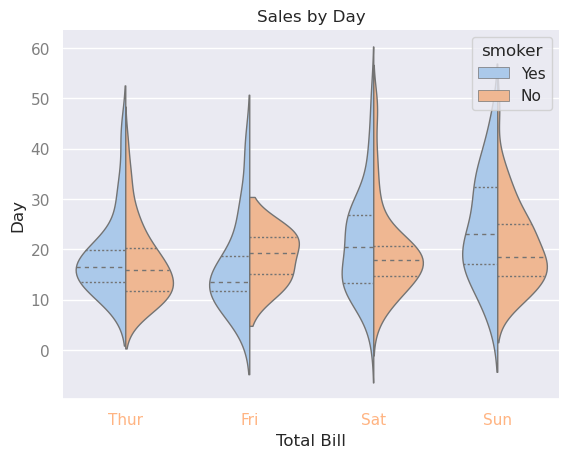

In [16]:
# Import Seaborn and set the styling you want: 
import seaborn as sns
sns.set_theme(style="darkgrid", palette="pastel")

# Load the example tips dataset
tips = sns.load_dataset("tips")

# Draw a nested violinplot and split the violins for easier comparison
p = sns.violinplot(data=tips, x="day", y="total_bill", hue="smoker",
               split=True, inner="quart", linewidth=1)

p.set(xlabel='Total Bill',
       ylabel='Day',
       title='Sales by Day')

sns.despine(left=True)

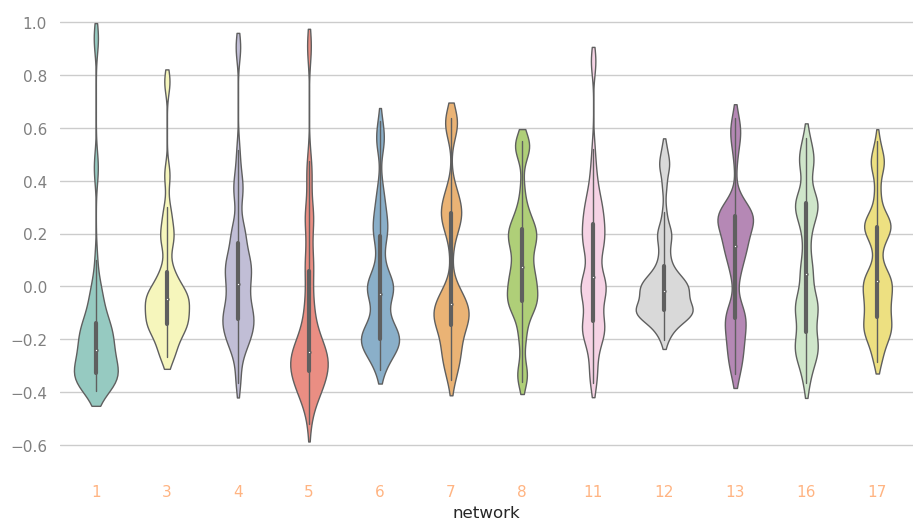

In [17]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

# Load the example dataset of brain network correlations
df = sns.load_dataset("brain_networks", header=[0, 1, 2], index_col=0)

# Pull out a specific subset of networks
used_networks = [1, 3, 4, 5, 6, 7, 8, 11, 12, 13, 16, 17]
used_columns = (df.columns.get_level_values("network")
                          .astype(int)
                          .isin(used_networks))
df = df.loc[:, used_columns]

# Compute the correlation matrix and average over networks
corr_df = df.corr().groupby(level="network").mean()
corr_df.index = corr_df.index.astype(int)
corr_df = corr_df.sort_index().T

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 6))

# Draw a violinplot with a narrower bandwidth than the default
sns.violinplot(data=corr_df, palette="Set3", bw=.2, cut=1, linewidth=1)

# Finalize the figure
ax.set(ylim=(-.7, 1.05))
sns.despine(left=True, bottom=True)

### Split categorical histograms with a Ridge Plot

Taken from https://docs.bokeh.org/en/latest/docs/user_guide/categorical.html

In [18]:
import colorcet as cc
from numpy import linspace
from scipy.stats import gaussian_kde

from bokeh.io import output_notebook, show
from bokeh.models import ColumnDataSource, FixedTicker, PrintfTickFormatter
from bokeh.plotting import figure
from bokeh.sampledata.perceptions import probly

output_notebook()

def ridge(category, data, scale=20):
    return list(zip([category]*len(data), scale*data))

cats = list(reversed(probly.keys()))

palette = [cc.rainbow[i*15] for i in range(17)]

x = linspace(-20,110, 500)

source = ColumnDataSource(data=dict(x=x))

p = figure(y_range=cats, width=700, x_range=(-5, 105), toolbar_location=None)

for i, cat in enumerate(reversed(cats)):
    pdf = gaussian_kde(probly[cat])
    y = ridge(cat, pdf(x))
    source.add(y, cat)
    p.patch('x', cat, color=palette[i], alpha=0.6, line_color="black", source=source)

p.outline_line_color = None
p.background_fill_color = "#efefef"

p.xaxis.ticker = FixedTicker(ticks=list(range(0, 101, 10)))
p.xaxis.formatter = PrintfTickFormatter(format="%d%%")

p.ygrid.grid_line_color = None
p.xgrid.grid_line_color = "#dddddd"
p.xgrid.ticker = p.xaxis[0].ticker

p.axis.minor_tick_line_color = None
p.axis.major_tick_line_color = None
p.axis.axis_line_color = None

p.y_range.range_padding = 0.12

show(p)

Loading BokehJS ...

### Why not 3D?

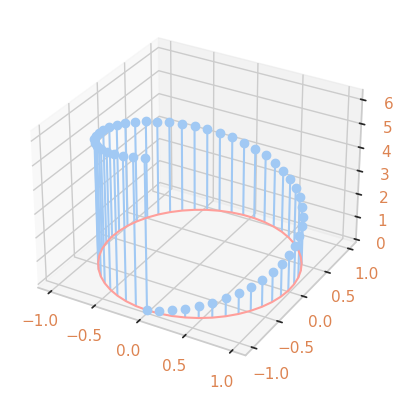

In [40]:
import matplotlib.pyplot as plt
import numpy as np

theta = np.linspace(0, 2*np.pi)
x = np.cos(theta - np.pi/2)
y = np.sin(theta - np.pi/2)
z = theta

fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))
ax.stem(x, y, z)

plt.show()

## Finally, a book recommendation:
    
### Data Visualisation: A Handbook for Data Driven Design
by Andy Kirk

https://www.amazon.com/Data-Visualisation-Handbook-Driven-Design/dp/1473912148

![book](https://m.media-amazon.com/images/I/41FTNpY0b9L._SX382_BO1,204,203,200_.jpg)